In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.utils import np_utils
import os
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.constraints import maxnorm
from keras import optimizers


Using TensorFlow backend.


In [0]:
seed=7
np.random.seed(seed)
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

In [0]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [0]:
num_classes = y_test.shape[1]

In [0]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

W0713 17:46:35.187724 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 17:46:35.224127 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 17:46:35.233234 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 17:46:35.262077 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0713 17:46:35.270083 

In [0]:

model.compile(loss='categorical_crossentropy', optimizer="Adam" ,metrics=['accuracy'])

W0713 17:46:40.878445 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 17:46:40.905614 140623056041856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

W0713 17:48:21.565476 140623056041856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.7337 - acc: 0.3551 - val_loss: 1.3990 - val_acc: 0.5039
Epoch 2/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.2444 - acc: 0.5499 - val_loss: 1.0483 - val_acc: 0.6275
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.0280 - acc: 0.6343 - val_loss: 0.8720 - val_acc: 0.6956
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.9102 - acc: 0.6796 - val_loss: 0.8144 - val_acc: 0.7184
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8182 - acc: 0.7107 - val_loss: 0.7528 - val_acc: 0.7420
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.7499 - acc: 0.7368 - val_loss: 0.7025 - val_acc: 0.7518
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.6890 - acc: 0.7574 - val_loss: 0.7070 -

In [0]:
 scores = model.evaluate(X_test, y_test, verbose=0)

In [0]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 0.6005528712511062
Test accuracy: 0.8258


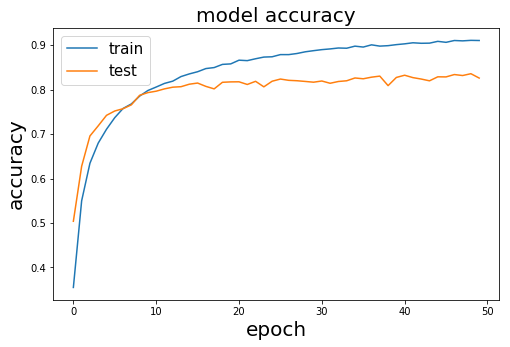

In [0]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy', size=20)
plt.ylabel('accuracy', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})


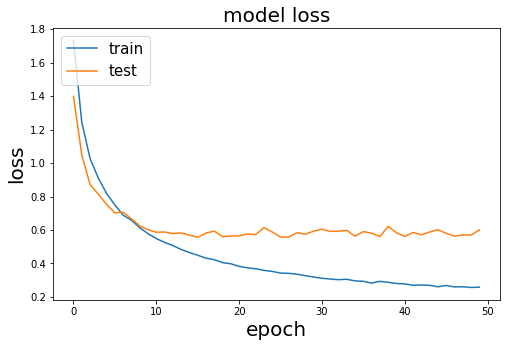

In [0]:
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss', size=20)
plt.ylabel('loss', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})

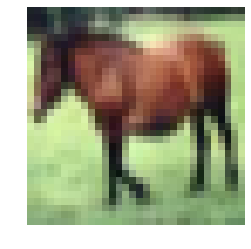

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


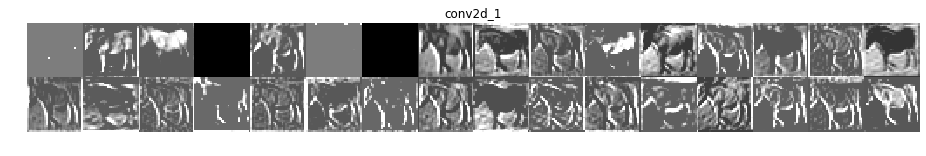

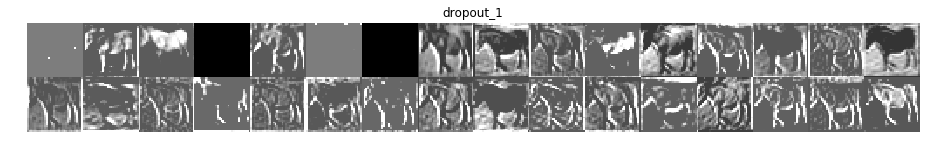

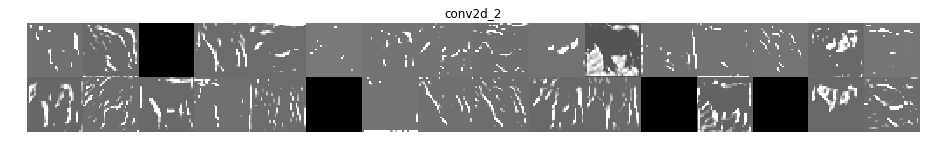

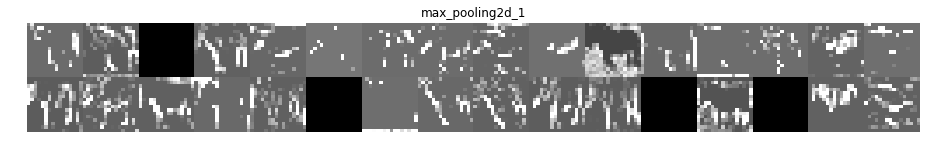

In [0]:
img_index = 7
test_im = X_train[img_index] #np.random.random((1, 128, 128, 1)) * 20 + 128#X_train[1]
test_im_class = np.argmax(y_train[img_index])

#print("labels:", target_names[test_im_class])

fig=plt.figure()	
plt.imshow(test_im.reshape(32, 32,3), cmap='RdPu', interpolation='none')
plt.axis('off')
plt.show()
fig.savefig('inputImage.jpg')

layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1, 32, 32,3))



layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    #if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        fig = plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis('off')
        plt.imshow(display_grid, aspect='auto', cmap= 'gray')
        

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from itertools import product



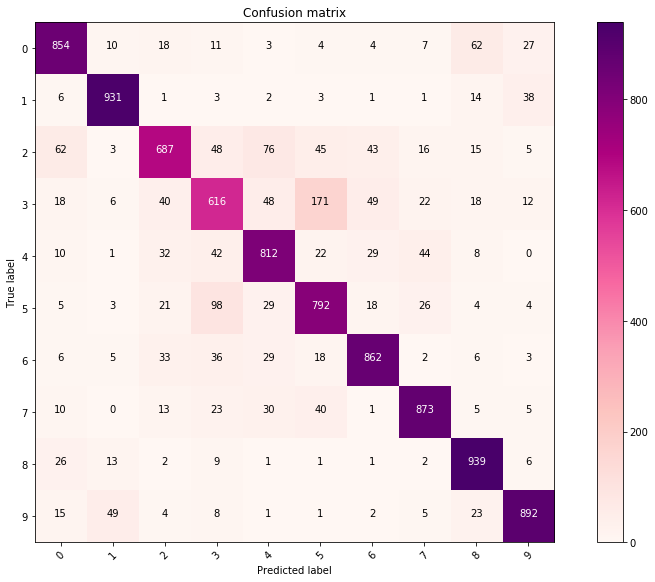

In [0]:

def plot_confusion_matrix(cm, num_classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="RdPu"):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(num_classes))
    plt.xticks(tick_marks, num_classes, rotation=45)
    plt.yticks(tick_marks, num_classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

   
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, num_classes=range(10)) 

In [0]:
import cv2
from PIL import Image
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

Saving air2.jpg to air2.jpg


In [0]:
!ls

air2.jpg  inputImage.jpg  sample_data


In [0]:
import os
os.getcwd()

'/content'

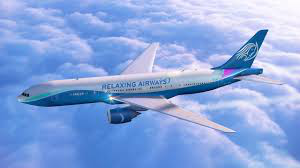

In [0]:
pic=Image.open("air2.jpg")
pic

In [0]:
pic_arr = np.asarray(pic)
pic_arr.shape

(168, 300, 3)

In [0]:
res = cv2.resize(pic_arr, dsize=(32,32), interpolation=cv2.INTER_NEAREST)

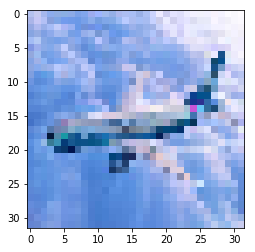

In [0]:
plt.imshow(res)

In [0]:
res=res.astype('float32')
res=res/255.0

In [0]:
CATEGORIES =np.asarray( ["airplane","automobile","bird", "cat", "deer" ,"dog","frog","horse", "ship", "truck"])

In [0]:
output=model.predict(res.reshape(1,32,32,3))
Y_pred_classes = np.argmax(output,axis = 1)

print(CATEGORIES[Y_pred_classes])

['airplane']


In [0]:
uploaded = files.upload()

Saving 5cbf50dfd1a2f8074406a8b2-750-562.jpg to 5cbf50dfd1a2f8074406a8b2-750-562.jpg


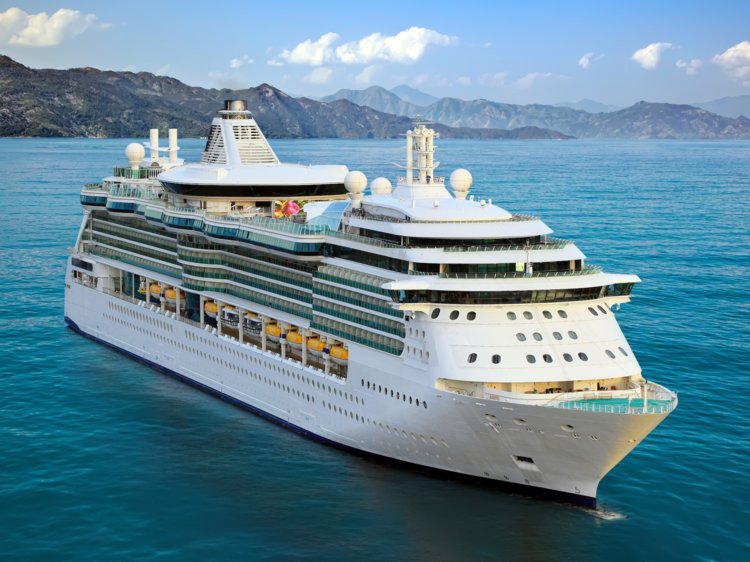

In [0]:
pic_1=Image.open("5cbf50dfd1a2f8074406a8b2-750-562.jpg")
pic_1

In [0]:
pic_arr1 = np.asarray(pic_1)

In [0]:
pic_arr1.shape

(562, 750, 3)

In [0]:
res_1 = cv2.resize(pic_arr1, dsize=(32,32), interpolation=cv2.INTER_NEAREST)

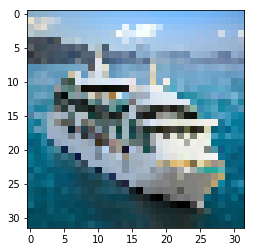

In [0]:
plt.imshow(res_1)

In [0]:
res_1=res_1.astype('float32')
res_1=res_1/255.0

In [0]:
output_1=model.predict(res_1.reshape(1,32,32,3))
Y_pred_classes = np.argmax(output_1,axis = 1)
print(CATEGORIES[Y_pred_classes])

['ship']


In [0]:
uploaded = files.upload()

Saving e29d39ba810b4235ae824cc07259ad61.jpg to e29d39ba810b4235ae824cc07259ad61.jpg


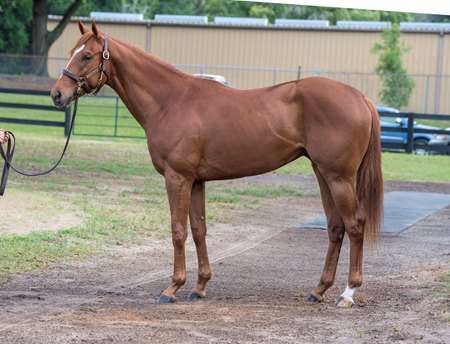

In [0]:
pic_2=Image.open("e29d39ba810b4235ae824cc07259ad61.jpg")
pic_2

In [0]:
pic_arr_2 = np.asarray(pic_2)
pic_arr_2.shape

(344, 450, 3)

In [0]:
res_3 = cv2.resize(pic_arr_2, dsize=(32,32), interpolation=cv2.INTER_NEAREST)

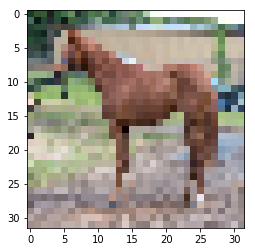

In [0]:
plt.imshow(res_3)

In [0]:
output_2=model.predict(res_3.reshape(1,32,32,3))
Y_pred_classes = np.argmax(output_2,axis = 1)
print(CATEGORIES[Y_pred_classes])

['horse']
